# Working with temporal data

> “Ever since the dawn of civilization, people have not been content to see events as unconnected and inexplicable. They have craved an understanding of the underlying order in the world." - Stephen Hawking (1988)

Time is one of the most fundamental ways how we humans organize things in life and what we use to find understanding of the underlying world as Stephen Hawking `{cite}hawking1988` famously put it in his book "A brief history of time". Hence, it is not surprising that the time dimension is very commonly attached to almost all data that we have in the world (the other dimension is naturally space or location, which we will focus in Part II). Hence, being able to handle and work with temporal information is extremely important when doing data analysis. Time information in the data allows us to see patterns through time (trends) as well as to make predictions into the future (at varying level of confidence). In this section, we will introduce some of the core ideas and functionalities how you can work with temporal data in Python and pandas.

## Date and time basics

Before doing any progamming, we need to understand a few details about time conventions themselves. There are a couple of ways how the time information (commonly referred as `timestamp`) is typically represented. The first one is to represent the temporal information as text with specific format such as `"2020-12-24T09:12:45Z"` which follows an international ISO 8601 standard [^isostandard]. In this format, the date components (year, month, day) are separated with dash (`-`) and the time components (hour, minute, second) are separated with colon (`:`). Typically there is a letter `T` separating the date and time components from each other (in some other formats, there could just be a space between them). 

The letter `Z` at the end of the string relates to time zones and means that the time here is represented as Coordinated Universal Time (UTC). Time zone information around the world are expressed using negative or positive offsets from the UTC. `UTC±00:00` is the same as Greenwhich Mean Time (GMT), and it was chosen after a series of conferences between 1881-1884 (Ogle, 2015) as the worldwide standard for representing the zone 0 to which all other time zones in the world are relative to. For instance, the local time in Finland is two hours ahead of UTC, meaning that the time zone information is expressed as `UTC+2` or `UTC+02:00`, whereas the local time in New York is four hours behind UTC respectively (i.e. `UTC-4`). 

Another commonly used way to represent time in addition to ISO standardized timestamp is to use a so called *Unix time* (also known as *Epoch time* or *POSIX time*). Unix time is expressed as number of seconds since *Unix Epoch* that was on the first of January 1970 at midnight in UTC (i.e. `1970-01-01T00:00:00Z`). This system was developed to describe a point in time in numerical format, and it is widely used in computers by different operating systems. Unix time increments every second and e.g. the Unix time of December 22nd 2020 at 15:00:00 (UTC) is represented as a single number `1608649200`. Using this kind of numerical representation of time makes it much easier for computers to store and manipulate the time information compared to having the information in textual format (`2020-12-22T15:00:00Z`). 

Lastly, an important convention that relates to time series data is a concept called Daylight Saving Time (DST), also known as summer time. DST is a commonly used practice for advancing clocks typically by an hour during warmer months so that darkness falls at a later clock time. This is also the reason why e.g. the time zone information in Finland has an offset of +03:00 (summer time) instead of +02:00 which follows the official time zone specification for Finland. DST became a common practice after the global energy crisis in the 1970s and it was introduced in many countries during the following decade. However, some countries have never followed this convention, and there is an ongoing discussion to abandon the convention e.g. in EU.

## Working with temporal data in Python

Next we will learn how temporal data can be handled in Python in general. The most fundamental Python library for dealing with temporal data is called `datetime` that supplies functionalities to construct and manipulate dates and times. The module is one of the Python's standard libraries, hence you do not need to install it separately. Other useful libraries for dealing with time and dates are `time` and `calendar` which provide some additional functionalities in addition to the functionalities provided by `datetime`. In addition, `pytz` library provides many useful functionalities to deal with time zone information and `dateutil` provides some handy functionalities to automate date parsing. Most often the `datetime` module and `pytz` (in addition to pandas) provide everything you need when doing analysis with temporal data. 

## Constructing datetime objects

A `datetime` object is a representation of time in a way that Python can understand and operate with it. With the `datetime` library it is possible to construct a `datetime` object for example by `parsing` it from text following the ISO 8601 format or from the Unix timestamp (notice that the name of the library and the object are the same). Let's see how we can construct a `datetime` object from text using a function `strptime()`. The `strptime()` function takes the variable `timestamp` as the first argument representing the time in textual format and a second argument ("%Y-%m-%dT%H:%M:%S") which looks quite complicated, but it is the `format code` that instructs the `datetime` how the textual representation of the time should be interpreted:

In [1]:
from datetime import datetime
timestamp = "2020-12-22T15:00:00"
datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S")

datetime.datetime(2020, 12, 22, 15, 0)

As a result we get a `datetime` object in which the date has been converted into a set of numbers, in which the first one is the year, second one is month, third one day, and so on. This structure is always the same, no matter in what format the input data has been. By using the format codes (i.e. the second argument of the function), we can tell the computer that the first component in our string represents year in 4 digits. The `%Y` characters (i.e. a *directive*) is a special way to instruct the computer to do so. In a similar manner, we can instruct the computer to read the month based on numbers with two digits (`12`) using the directive `%m`. As you can see, there is always a `%` character and then some letter after it, which is the way how we determine how the date is formatted in our text. Notice that the date components are separated with dash (`-`) and the time components are separated with colons (`:`). As we can see from our format code, we can add those separator characters between the directives just as they are represented in the timestamp. Following this approach it is possible to parse basically any kind of time information represented as text. A few of the most commonly used datetime format code directives are listed in Table 2.1. 

_**Table 2.1**. Most commonly used datetime directives and their meaning._

| Directive | Description                                              | Examples                          |
|-----------|----------------------------------------------------------|-----------------------------------|
| %y        | Year without century as a zero-padded number.            | 00, 01, 10, 20                    |
| %Y        | Year including century as a zero-padded number.          | 2000, 1900, 1920                  |
| %m        | Month as a zero-padded number.                           | 01,02, ... , 11, 12               |
| %b        | Month as abbreviated name.                               | Jan, Feb, ..., Dec                |
| %B        | Month as full name.                                      | January, February, ..., December  |
| %d        | Day of the month as a zero-padded number.                | 01, 02, ..., 30, 31               |
| %H        | Hour (24-hour clock) as a zero-padded number.            | 00, 01, ..., 22, 23               |
| %I        | Hour (12-hour clock) as a zero-padded number.            | 01, 02, ..., 11, 12               |
| %p        | AM or PM (12-hour clock).                                | am, pm, AM, PM                    |
| %M        | Minute as a zero-padded number.                          | 00, 01, ..., 58, 59               |
| %S        | Second as a zero-padded number.                          | 00, 01, ..., 58, 59               |
| %z        | UTC offset (can be empty).                               | +0000, +2000, -4000               |
| %Z        | Time zone name (can be empty).                           | UTC, GMT                          |
| %a        | Weekday as abbreviated name.                             | Mon, Tue, Sat, Sun                |
| %A        | Weekday as full name.                                    | Monday, Tuesday, Saturday, Sunday |
| %w        | Weekday as a number where 0 is Sunday and 6 is Saturday. | 0, 1, 2 ..., 6                    |



To crystallize the understanding how the timestamps can be parsed, let's look at a few more examples where we also include time zone information and parse the date information based on a format how we typically write dates as humans (without time component). Let's start by adding `+0200` to the end of the timestamp to express the UTC+2 time zone:    

In [2]:
timestamp_with_tz = "2020-12-22T15:00:00 +0200"
dtz = datetime.strptime(timestamp_with_tz, "%Y-%m-%dT%H:%M:%S %z")
dtz

datetime.datetime(2020, 12, 22, 15, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))

As we can see, now we produced the `datetime` object having time zone information attached into the `tzinfo` attribute showing the offset (i.e. *timedelta*) from UTC represented in seconds. Having the timezone information attached can be very useful if doing analysis with temporal data that has been collected from different parts of the world (under different time zones). Let's still take a look at an example in which we parse the `datetime` object from a textual representation that is written in a way how we humans normally write dates:

In [3]:
date_written = "22 December 2020"
datetime.strptime(date_written, "%d %B %Y")

datetime.datetime(2020, 12, 22, 0, 0)

Here, we used a bit different format for instructing the computer how to read the text by using `%B` to denote a written month name, also we changed the order of the directives and used an empty space between them. Writing the exact form of how the timestamp information is written can be quite devious work, especially if working with handwritten data where stucture of the time information can vary a lot. Luckily, Python provides a handy library `dateutil` that automates most of this work. We can use a function called `parse()` that can automatically construct the `datetime` object from various formats:

In [4]:
from dateutil.parser import parse
timestamp_with_tz = "2020-12-22T15:00:00 +0200"
date_written = "22 December 2020"
dt1 = parse(timestamp_with_tz)
dt2 = parse(date_written)
print(dt1, "\n", dt2)

2020-12-22 15:00:00+02:00 
 2020-12-22 00:00:00


All of the previous examples focused on using textual representation of time as input. Naturally it is also possible to construct a datetime object using Unix time representation. Because Unix time is a simple number, it is much more straightforward to parse a datetime object based on them. This is how would convert a Unix time `1608649200` into a `datetime` using `fromtimestamp()` function:

In [5]:
unix_time = 1608649200
datetime.fromtimestamp(unix_time)

datetime.datetime(2020, 12, 22, 17, 0)

Wait, what? In the beginning of this chapter, we said that Unix time `1608649200` should be "December 22nd 2020 at 15:00:00 (UTC)", but here we have the result as five o'clock (i.e. 17, 0). This is due to the fact that the computer that this code is written with is located at a Finnish time zone (UTC+02), and as the Unix time is always passed as UTC time (GMT), the computer automatically returns the timestamp in local timezone (i.e. in Finnish time or whatever the local time has been specified in your computer's settings). This is a good thing to understand because it can be rather confusing sometimes when working with temporal data. Finally, it is naturally possible to initialize the `datetime` object also directly by passing integer numbers into the object itself. Here we use the same date and time as before but add `30` seconds to the end:  

In [6]:
dt = datetime(2020, 12, 22, 17, 0, 30)
dt

datetime.datetime(2020, 12, 22, 17, 0, 30)

## Parsing temporal components from datetime object

There are few useful tricks that you can do with the `datetime` objects. It is for example possible to parse specific temporal components directly from the `datetime` object. You can for example access the `.year`, `.month`, `.day`, `.hour`, `.minute` and `.second` attributes very easily that will return the value of the temporal element as an integer number:

In [7]:
dt = datetime(2020, 12, 22, 17, 0, 30)
print(dt.year)
print(dt.month)
print(dt.day)
print(dt.hour)

2020
12
22
17


In addition, you can parse for example the day of week by using `weekday()` function or parse only the date components from the `datetime` object by using `date()` function:

In [8]:
print(dt.weekday())
print(dt.date())

1
2020-12-22


By using `strftime()` function, you can use the same directives from Table 2.1 to construct and convert the `datetime` object to any text representation of the date and time. Next, we will see how this function can be used quite nicely for creating an easily understandable text based on our date and time information:

In [9]:
custom_format = "%d %B %Y is %A. The time is %I:%M %p."
datetime.strftime(dt, custom_format)

'22 December 2020 is Tuesday. The time is 05:00 PM.'

## Working with temporal data in pandas

After learning the basics of how the temporal data can be represented as `datetime` objects, we can continue and see how temporal data can be manipulated in pandas. Pandas is extremely powerful and flexible what comes to working with temporal data. For instance, all the simple tricks that we saw earlier with `datetime` can be done also with pandas. When doing data analysis with pandas, it is typical that instead of dealing with single time observations, you actually work with time series data, such as the hourly temperature values that we analyzed in the previous section. Pandas supports many useful functionalities related to parsing, manipulating and aggregating time series data. Let's start exploring the temporal capabilities of pandas by reading the hourly temperature observations from the same CSV file in a similar manner as we did previously. As a reminder, this is how the data look like:

``` 
  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW  ...
029440 99999 190601010600 090   7 *** *** OVC * * *  0.0 ** ** ** ** **  ...
029440 99999 190601011300 ***   0 *** *** OVC * * *  0.0 ** ** ** ** **  ...
029440 99999 190601012000 ***   0 *** *** OVC * * *  0.0 ** ** ** ** **  ...
029440 99999 190601020600 ***   0 *** *** CLR * * *  0.0 ** ** ** ** **  ...
```

The timestamps stored in the column `YR--MODAHRMN` can be automatically converted to `datetime` objects when reading the data by using `parse_dates` parameter and providing a list of column names that should be parsed to `datetime`. We also specify with `usecols` parameter that we only want to keep three columns from the file (station number, time information and temperature):

In [17]:
import pandas as pd

# Read the data and parse dates
fp = 'data/029820.txt'
data = pd.read_csv(fp, delim_whitespace=True, 
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['USAF','YR--MODAHRMN', 'TEMP'],
                   parse_dates=["YR--MODAHRMN"]
                  )
# Rename the columns
new_cols = ['STATION_NUMBER', 'TIME', 'TEMP_F']
data.columns = new_cols
data.head()

,STATION_NUMBER,TIME,TEMP_F
0,29820,1906-01-01 06:00:00,34.0
1,29820,1906-01-01 13:00:00,32.0
2,29820,1906-01-01 20:00:00,30.0
3,29820,1906-01-02 06:00:00,33.0
4,29820,1906-01-02 13:00:00,35.0


As we can see, the values in `TIME` column were automatically parsed into a format that are much easier to read than the original ones. When using pandas datetime parsing functionalities, the timestamps can be represented in different formats such as text in ISO 8601 format or Unix times (seconds since 1.1.1970). Let's take a look how the values in our `TIME` column look like:

In [18]:
data["TIME"].head()

0   1906-01-01 06:00:00
1   1906-01-01 13:00:00
2   1906-01-01 20:00:00
3   1906-01-02 06:00:00
4   1906-01-02 13:00:00
Name: TIME, dtype: datetime64[ns]

As we can see, pandas actually converted the timestamp values into a time series having specific data type called `datetime64`. The individual value of the time series is a specific pandas object called `Timestamp` that is a similar object as the Python's regular `datetime` object that we saw previously: 

In [19]:
data.loc[0, "TIME"]

Timestamp('1906-01-01 06:00:00')

The `TimeStamp` object contains all the same attributes as the `datetime` object, but in addition, it has many useful attributes and functions that can be used in a vectorized manner. For instance, you can parse different temporal components from the time series stored in a column very efficiently. Let's parse the temporal components from `TIME` into columns `YEAR`, `MONTH`, `DAY` and `HOUR`: 

In [20]:
data["YEAR"] = data["TIME"].dt.year
data["MONTH"] = data["TIME"].dt.month
data["DAY"] = data["TIME"].dt.day
data["HOUR"] = data["TIME"].dt.hour
data.head()

,STATION_NUMBER,TIME,TEMP_F,YEAR,MONTH,DAY,HOUR
0,29820,1906-01-01 06:00:00,34.0,1906,1,1,6
1,29820,1906-01-01 13:00:00,32.0,1906,1,1,13
2,29820,1906-01-01 20:00:00,30.0,1906,1,1,20
3,29820,1906-01-02 06:00:00,33.0,1906,1,2,6
4,29820,1906-01-02 13:00:00,35.0,1906,1,2,13


Now the new columns have corresponding integer values for each temporal component. We were able to access all the temporal attributes by using the `.dt` accessor that is available for all `Series` having `datetime64` data type. We can also combine the datetime functionalities with other methods from pandas. For example, we can check that we have observations from 69 years in total: 

In [21]:
data['TIME'].dt.year.nunique()

69

### Handling time zones in pandas

When reading time series data to pandas as we did previously, the timestamp objects are represented without time zone information. However, it is straighforward to attach time zone information to a Series with Timestamp objects by using a method called `tz_localize()`. When manipulating the data based on time information in pandas, the first step that you typically do, is to set a *{term}`DateTimeIndex`* for you DataFrame (here based on column 'TIME') with `set_index()` method. Next, we will set the index and specify appropriate time zone for our data (*Europe/Helsinki*). We will also specify the `nonexistent` parameter as "shift_forward", due to the fact that when the clocks are adjusted when changing from winter time to summer time, there is literally one non-existing hour during the night. With this parameter we tell pandas that this is okay, and we just want to shift the time forward (by an hour in most cases) in case there are such "non-existing" time observations. With `ambiguous` parameter, we tell pandas that when adjusting the clocks backwards (moving from summer time to winter time), the observations having ambigous times (e.g. duplicate timestamps due to Daylight Saving Time) are set as `NaT` (Not-a-Time). Notice that it is up to you to decide what is appropriate way of handling such cases (there are also other options for this parameter, such as "infer"):  

In [22]:
data = data.set_index("TIME")
data = data.tz_localize("Europe/Helsinki", 
                        nonexistent="shift_forward",
                        ambiguous="NaT")
data.tail()

,STATION_NUMBER,TEMP_F,YEAR,MONTH,DAY,HOUR
TIME,,,,,,
2019-10-01 19:00:00+03:00,29820,47.0,2019,10,1,19
2019-10-01 20:00:00+03:00,29820,47.0,2019,10,1,20
2019-10-01 21:00:00+03:00,29820,47.0,2019,10,1,21
2019-10-01 22:00:00+03:00,29820,47.0,2019,10,1,22
2019-10-01 23:00:00+03:00,29820,46.0,2019,10,1,23


Now the TIME column is set as our index and it was moved to the left and replaced the original sequantial numbers. Notice that the `TIME` column is no longer part of the columns in our DataFrame (we will later see how to get it back as a column). Also the time zone information was attached to the Timestamp objects as can be seen by the five last characters showing `+03:00`. From this information we can see that the time zone in Finland is +3 hours at the given date (summer time). We can easily access the values in the index by calling it as follows: 

In [33]:
data.index

DatetimeIndex(['1906-01-01 06:00:00', '1906-01-01 13:00:00',
               '1906-01-01 20:00:00', '1906-01-02 06:00:00',
               '1906-01-02 13:00:00', '1906-01-02 20:00:00',
               '1906-01-03 06:00:00', '1906-01-03 13:00:00',
               '1906-01-03 20:00:00', '1906-01-04 06:00:00',
               ...
               '2019-10-01 14:00:00', '2019-10-01 15:00:00',
               '2019-10-01 16:00:00', '2019-10-01 17:00:00',
               '2019-10-01 18:00:00', '2019-10-01 19:00:00',
               '2019-10-01 20:00:00', '2019-10-01 21:00:00',
               '2019-10-01 22:00:00', '2019-10-01 23:00:00'],
              dtype='datetime64[ns]', name='TIME', length=198334, freq=None)

In [24]:
data.index[0]

Timestamp('1906-01-01 06:00:00+0140', tz='Europe/Helsinki')

As we can see, the index is now a `DatetimeIndex` which is essentially an array consisting of `Timestamp` objects armed with all the attributes and methods that we have seen in the previous examples. In addition, our array has time zone specified as "Europe/Helsinki". Hint: If you want to know the available time zones, you can access them by `from pytz import all_timezones` which imports them into the variable `all_timezones` as a list. 

There are a couple of important notions that we can make from the data in this array. Firstly, the Timestamps in the index from the year 1906 seem to have a quite odd time zone information attached to them (+01:40), which differs from the offset of the last observations (+03:00) by an hour and twenty minutes. This might seem a bit strange, although everything is as it should, and a couple of international conventions regarding time explain these differences. First explanation relates to a fact that representing local time following time zone specification as an offset from UTC is merely a contract between countries targeted to standardize the representation of time in different parts of the world. But as with any international contract, the standardization process typically happens at different times in different countries, and it is not unheard of to make changes to these agreements. An example of such a change can be witnessed here, as Finland changed its time zone from Helsinki Mean Time (with +01:40 offset from UTC) to Eastern European Time (with +02:00 from UTC) in May 1st 1921. Hence, all timestamps recorded before the aforementioned date have a somewhat unusual offset from UTC (100 minutes). Similar special arrangements have been quite common in the history, so it is good to be careful and aware of these situations whenever working with historical time series. Second important convention relates to the Daylight Saving Time (DST), which was introduced in Finland in 1981, and is the reason why the last values in our DatetimeIndex have an offset of +03:00 (summer time) instead of +02:00. As you might guess, all these international practices and contracts can make working with date and time information quite tricky. Luckily, pandas (and the underlying pytz library) handles these things very well, and we do not need to worry too much about the international time convensions.     

In some occasions, you might want to convert your time series data from one time zone to another. If you for example, would like to understand what the time was in New York when these weather observations were recorded, you could convert the time information easily with `.dt.tz_convert()` function. Before making the conversion between the time zones, we need to return the TIME Series from the index back to a normal pandas column by using `.reset_index()` method that returns the `TIME` column back to DataFrame as a normal column. When manipulating time series, it is quite typical to set a specific column as an index for the DataFrame and then swap it back to a "normal" column for further manipulation, as in the following: 

In [25]:
# 'TIME' column is returned back as a normal column
data = data.reset_index()
data["NY_TIME"] = data["TIME"].dt.tz_convert("US/Eastern")
data.head()

,TIME,STATION_NUMBER,TEMP_F,YEAR,MONTH,DAY,HOUR,NY_TIME
0,1906-01-01 06:00:00+01:40,29820,34.0,1906,1,1,6,1905-12-31 23:20:00-05:00
1,1906-01-01 13:00:00+01:40,29820,32.0,1906,1,1,13,1906-01-01 06:20:00-05:00
2,1906-01-01 20:00:00+01:40,29820,30.0,1906,1,1,20,1906-01-01 13:20:00-05:00
3,1906-01-02 06:00:00+01:40,29820,33.0,1906,1,2,6,1906-01-01 23:20:00-05:00
4,1906-01-02 13:00:00+01:40,29820,35.0,1906,1,2,13,1906-01-02 06:20:00-05:00


Now we can see, that the timestamps were converted to represent the times in US/Eastern time zone and stored to the NY_TIME column. For example the first observation in our data that was recorded at 6 AM 1st of January in 1906 was correctly converted to a value from the last day of previous year at 11:20 PM (`1905-12-31 23:20`). This functionality can be very useful when working with temporal data from different parts of the world. Quite often the data collected from different global services (such as tweets collected from Twitter) store the information as UTC values. Hence, it is up to the user to parse the correct local time for tweets posted in different parts of the world. Using pandas for doing these kind of manipulation with the temporal data is extremely handy and efficient. In case your data is already represented in different timezones, pandas makes your life easy because timestamps are stored under the hood always in UTC. This means that it is straightforward to do operations between the two time series without any additional timezone conversions. We can for example do simple calculations between two DataFrames that are represented in different timezones:  

In [26]:
sample1 = data[["TIME", "TEMP_F"]].head()
sample1 = sample1.set_index("TIME")
sample1

,TEMP_F
TIME,
1906-01-01 06:00:00+01:40,34.0
1906-01-01 13:00:00+01:40,32.0
1906-01-01 20:00:00+01:40,30.0
1906-01-02 06:00:00+01:40,33.0
1906-01-02 13:00:00+01:40,35.0


In [27]:
sample2 = data[["NY_TIME", "TEMP_F"]].head()
sample2 = sample2.set_index("NY_TIME")
sample2

,TEMP_F
NY_TIME,
1905-12-31 23:20:00-05:00,34.0
1906-01-01 06:20:00-05:00,32.0
1906-01-01 13:20:00-05:00,30.0
1906-01-01 23:20:00-05:00,33.0
1906-01-02 06:20:00-05:00,35.0


Now we have the same temperature values in both DataFrames but these observations are represented in different time zones. Now, we can for instance sum up these temperatures, which works because the time of the observations matches:

In [28]:
sample1["TEMP_F"] + sample2["TEMP_F"]

TIME
1906-01-01 04:20:00+00:00    68.0
1906-01-01 11:20:00+00:00    64.0
1906-01-01 18:20:00+00:00    60.0
1906-01-02 04:20:00+00:00    66.0
1906-01-02 11:20:00+00:00    70.0
Name: TEMP_F, dtype: float64

As you can see, pandas automatically converted the temporal information to UTC timezone, and the temperature values were summed up correctly.

## Selecting data based on DateTimeIndex

In chapter 3.3, we saw how to select observations using simple string manipulation operations applied to the timestamp. Although this worked quite well for our specific case, it is a rather glumpsy and inflexible approach to work with temporal information. A much better approach, is to take advantage of the `datetime` objects stored in the time series. Let's again first set the `TIME` column as index for our DataFrame by using the method `set_index()`:

In [32]:
fp = 'data/029820.txt'
data = pd.read_csv(fp, delim_whitespace=True, 
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['USAF','YR--MODAHRMN', 'TEMP'],
                   parse_dates=["YR--MODAHRMN"]
                  )
# Rename the columns
new_cols = ['STATION_NUMBER', 'TIME', 'TEMP_F']
data.columns = new_cols

# Set TIME as index
data = data.set_index("TIME")
data.head(2)

,STATION_NUMBER,TEMP_F
TIME,,
1906-01-01 06:00:00,29820,34.0
1906-01-01 13:00:00,29820,32.0


Now as we have equipped our DataFrame with *DateTimeIndex*, it is easy to filter the data based on specific criteria and e.g. select all observations that have been recorded in specific months of 2019. To do this, we can use `.loc` indexing in a similar manner as before, but pass the criteria for selecting the data using either `datetime` objects or strings that can be interpreted as a date. For instance, we can select the observations for January 2019 in a following manner based on datetime labels: 

In [34]:
start_dt = datetime(2019, 1, 1)
end_dt = datetime(2019, 1, 31)
january = data.loc[start_dt: end_dt].copy()
first, last = january.index.min(), january.index.max()
print("First obs:", first, "\nLast obs:", last)

First obs: 2019-01-01 00:00:00 
Last obs: 2019-01-31 00:00:00


As we mentioned, pandas also provides a nice and easy way to select observations e.g. for specific month by specifying the selection criteria as a string. This approach is very convenient because we can select observations by passing a single label to the `loc` indexer and pandas automatically detects based on the string, what should be done: 

In [35]:
february = data.loc["2019-02"].copy()
first, last = february.index.min(), february.index.max()
print("First obs:", first, "\nLast obs:", last)

First obs: 2019-02-01 00:00:00 
Last obs: 2019-02-28 23:00:00


As a result, we got all observations that were recorded during February 2019. Using this approach, called *partial string indexing*, is useful because it makes it easy for us to deal with irregular number of days in February (leap year). By passing the time window as a string that consists of the year and month information, we do not need to worry about leap years ourselves, as pandas does this automatically for us:

In [36]:
leap_year = data.loc["2016-02"].copy()
first, last = leap_year.index.min(), leap_year.index.max()
print("First obs:", first, "\nLast obs:", last)

First obs: 2016-02-01 00:00:00 
Last obs: 2016-02-29 23:00:00


Following the same approach, we can adjust the criteria to be a more specific time range, such as first two weeks of February:

In [37]:
first_two_weeks = data.loc["2018-02-01": "2018-02-14"].copy()
first_two_weeks.tail(2)

,STATION_NUMBER,TEMP_F
TIME,,
2018-02-14 22:00:00,29820,33.0
2018-02-14 23:00:00,29820,33.0


Or select data covering the whole year of 2018: 

In [38]:
data.loc["2018"]

,STATION_NUMBER,TEMP_F
TIME,,
2018-01-01 00:00:00,29820,34.0
2018-01-01 01:00:00,29820,33.0
2018-01-01 02:00:00,29820,34.0
2018-01-01 03:00:00,29820,34.0
2018-01-01 04:00:00,29820,35.0
...,...,...
2018-12-31 19:00:00,29820,36.0
2018-12-31 20:00:00,29820,36.0
2018-12-31 21:00:00,29820,37.0


Combining this kind of indexing with methods such as `first()` or `last()` is extremely powerful, as you can easily retrieve for example all observations within first 6 hours and 10 minutes of a specific day (an arbitrary duration), in case you would be interested to understand temperatures during night time:

In [39]:
data.loc["2018-01-01"].first("6H 10T")

,STATION_NUMBER,TEMP_F
TIME,,
2018-01-01 00:00:00,29820,34.0
2018-01-01 01:00:00,29820,33.0
2018-01-01 02:00:00,29820,34.0
2018-01-01 03:00:00,29820,34.0
2018-01-01 04:00:00,29820,35.0
2018-01-01 05:00:00,29820,36.0
2018-01-01 06:00:00,29820,36.0


The `6H` stands for a duration of six hours (number of hours plus letter `H`) and the `10T` is a duration of ten minutes (number of minutes plus `T`), and you can combine those into a single duration as shown above. In a similar manner, you can specify many other *{term}`DateOffsets`*, such as day (`D`) or second (`S`). The full list of all possible keywords (aliases) can be found from pandas documentation [^dateoffsets].  

## Resampling and calculating rolling statistics

Now as we know how to take advantage of the DatetimeIndex to make selections and time zone conversions, we are ready to explore further the functionalities of pandas for working with temporal data. One typical task when doing analysis with time series data is to *{term}`resample`* the time series from one frequency to another, such as aggregating the hourly temperature observations to daily averages. This might sound familiar, as we did this process previously (in 3.3) by using specific string manipulation tricks, and then grouping and aggregating the values. Now we will learn how to use pandas resampling functionalities that allows to conduct both downsampling (i.e. aggregating values) and upsampling based on specific interpolation methods. When doing interpolation, you fill missing values between observations based on specific criteria, such as taking the average between two consecutive observations. For instance, you could interpolate hourly temperature observations into 30 minute frequencies by assuming that the temperature in the middle of two time steps, such as 14:00 and 15:00, is the average of both giving you an estimate what the temperature might be at 14:30. Notice that whenever interpolating/upsampling data, you are basically making "sophisticated guesses" and there is always uncertainty involved with your estimates.  

Let's start by downsampling our observations into daily averages. To do this, we can use a `resample()` method that works in a bit similar manner as `groupby()` but it works with `DatetimeIndex` allowing you to easily control how the values should be grouped. Notice, that this only works with time series data, i.e. you need to make sure that you have set `DatetimeIndex` for your DataFrame. Whenever resampling data, you typically want to combine it with a specific aggregation method, such as `mean()`, `max()`, `min()`, which will then specify how you want to aggregate the data, such as calculating the daily averages:  

In [42]:
daily_averages = data.resample("1D").mean()
daily_averages.head()

,STATION_NUMBER,TEMP_F
TIME,,
1906-01-01,29820.0,32.000000
1906-01-02,29820.0,32.000000
1906-01-03,29820.0,27.666667
1906-01-04,29820.0,31.333333
1906-01-05,29820.0,31.666667


As a result we got a new DataFrame, in which all columns having numerical values were aggregated to daily averages. Notice, that averaging all numerical values in your DataFrame might not be what you want, e.g. here it does not really make any sense to take an average of the station number or any other columns expect the `TEMP_F` column. We can easily specify which columns should be aggregated by passing a list of column names after the `resample()` method:

In [43]:
daily_average_temps = data.resample("1D")[["TEMP_F"]].mean()
daily_average_temps.head()

,TEMP_F
TIME,
1906-01-01,32.000000
1906-01-02,32.000000
1906-01-03,27.666667
1906-01-04,31.333333
1906-01-05,31.666667


As a result, we got a new pandas DataFrame containing the average temperature for each day. It is very easy to change the resampling method, and e.g. find out the lowest temperatures for each week using the `.min()` function:

In [44]:
weekly_min_temps = data.resample("1W")[["TEMP_F"]].min()
weekly_min_temps.head()

,TEMP_F
TIME,
1906-01-07,26.0
1906-01-14,30.0
1906-01-21,21.0
1906-01-28,8.0
1906-02-04,18.0


In a quite similar manner, it is possible to do upsampling and e.g. interpolate hourly observations to higher frequency (e.g. every 30 minute) by filling the missing values using e.g. linear interpolation which "guesses" the missing values between two known points by fitting a straight line between the observations. Thus, the interpolated temperature between two consecutive hours is the average the two (as discussed in the beginning of this section):

In [45]:
selection = data.loc["2018-01-01 03:00": "2018-01-01 08:00"].copy()
selection.resample("30T").interpolate()[["TEMP_F"]]

,TEMP_F
TIME,
2018-01-01 03:00:00,34.0
2018-01-01 03:30:00,34.5
2018-01-01 04:00:00,35.0
2018-01-01 04:30:00,35.5
2018-01-01 05:00:00,36.0
2018-01-01 05:30:00,36.0
2018-01-01 06:00:00,36.0
2018-01-01 06:30:00,36.5
2018-01-01 07:00:00,37.0


As a result, our hourly data was now converted to higher frequency and e.g. the temperature at 03:30 is 34.5 Fahrenheits which is the average of its neighboring values. By default, the interpolation will automatically done for all columns containing numerical values and you can select the columns that you are interested in by passing a list of column names after calling the `interpolate()` method. There are also many other interpolation methods available, see details from the pandas documentation [^interpolation]. 

**Rolling statistics** is yet another useful technique to deal with time series data that is "noisy" or that has gaps between observations. Moving average is one such an operation in which observations are weighted (averaged) over a sliding "window" that is an efficient way to smooth the data and reduce variance between observations. For instance, stock market data or GPS observations representing the movement / speed profiles of vehicles are good examples of datasets that typically have a lot of variance, which can make it challenging to see patterns without smoothing. Pandas supports various moving window functions that have differences in how they influence the end result. Some of them use a static window size and weights the observations equally, whereas some functions can e.g. give more weight to more recent observations. Next we will see how moving average can be calculated with pandas, and how it influences our data. Let's start by taking a sample of our data covering the last 20 years and make a plot based on the temperature:

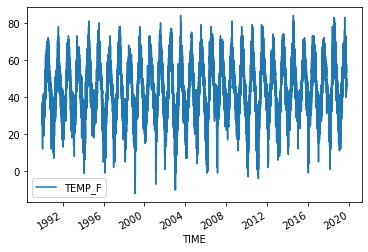

In [129]:
sample = data.loc["1990":"2020"].copy() 
sample.plot(y="TEMP_F");

In this plot we have time represented on the x-axis and the temperature in Fahrenheit on the y-axis. We can clearly see how the temperatures fluctuate over different seasons. Let's investigate our data a bit further and take a look of the first rows of our sample: 

In [132]:
sample.head(10)

,STATION_NUMBER,TEMP_F
TIME,,
1990-01-01 00:00:00,29820,32.0
1990-01-01 03:00:00,29820,31.0
1990-01-01 06:00:00,29820,31.0
1990-01-01 09:00:00,29820,31.0
1990-01-01 12:00:00,29820,31.0
1990-01-01 15:00:00,29820,30.0
1990-01-01 18:00:00,29820,28.0
1990-01-01 21:00:00,29820,29.0
1990-01-02 00:00:00,29820,29.0


As we see, the first rows in our sample contains observations every 3 hours or so. Let's test how we can apply rolling statistic over our tiem series and calculate a moving average based on four closest (consecutive) temperature observations. To do this, we can use a method called `.rolling()` that by default takes an integer number as an argument that specify how many observations should be grouped together (i.e. window size). By chaining the `.mean()` command after the first one, we can specify that we want to calculate the average temperature based on those four observations:

In [131]:
roll_a = sample["TEMP_F"].rolling(4).mean()
roll_a

TIME
1990-01-01 00:00:00      NaN
1990-01-01 03:00:00      NaN
1990-01-01 06:00:00      NaN
1990-01-01 09:00:00    31.25
1990-01-01 12:00:00    31.00
                       ...  
2019-10-01 19:00:00    49.00
2019-10-01 20:00:00    48.50
2019-10-01 21:00:00    47.75
2019-10-01 22:00:00    47.00
2019-10-01 23:00:00    46.75
Name: TEMP_F, Length: 119407, dtype: float64

As a result, we get a Series in which the time is the index and the newly calculated average temperatures are the values. As can be seen from here, the first three temperature values are NaNs which is expected, as we specified that the average should always be based on four consecutive observations. Hence,  with the first three observations the average cannot be calculated, and in this case pandas returns NaN. 

An important thing to notice here, is that the temporal resolution of our data seem to vary. This can be seen by comparing the first and last five timestamps to each other: in early 90's the frequency of the observations was 3 hours, but during 2019 the frequency has been 1 hour. This is a significant issue, because the temporal span of how the moving average is calculated differs, which can cause unwanted consequenses and errors in our analysis. Luckily, it is easy to fix this issue by passing a *{term}`DateOffset`* as an argument for the `.rolling()` command, in a similar manner as we did earlier when resampling our data. Hence, we can e.g. use a fixed window size of 1 day by passing "1D" to the function, and it will always keep the time span identical, no matter how many observations there would be recorded within a single day:

In [135]:
daily = sample["TEMP_F"].rolling("1D").mean()

Following this approach, it is easy to calculate rolling statistics with different window sizes, such as weekly, monthly or even annual averages. The main different between `.rolling()` and `.resample()` is that the former will maintain the number of observations in the data (but change the values according neighboring values e.g. based on mean), whereas the latter will actually aggregate and reduce the number of observations that will be kept in the result. To demonstrate the influence of "smoothing" to our time series based on moving average, let's calculate the moving average of temperatures based on window size of 180 days and 360 days (~year), and plot the results (details about plotting are discussed in the next chapter):

In [136]:
half_year = sample["TEMP_F"].rolling("180D").mean()
annual = sample["TEMP_F"].rolling("360D").mean()

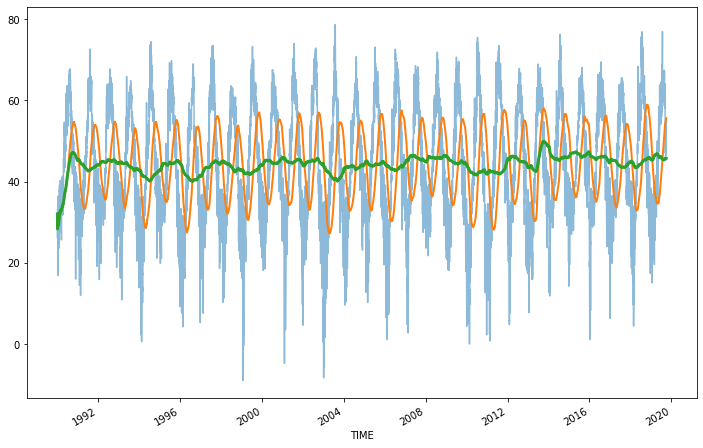

In [137]:
# Plot
ax = daily.plot(y="TEMP_F", figsize=(12,8), alpha=0.5)
ax = half_year.plot(ax=ax, y="TEMP_F", lw=2)
ax = annual.plot(ax=ax, y="TEMP_F", lw=3)

As a result, we have three different curves showing how the temperature values get smoothed by averaging. Green line is based on the moving average with 360 days; Orange line is based on the 180 days; and the blue line represents the moving average based on daily averages. As can be seen, the variance between observations is reduced (i.e. smoothed) when the size of the window gets larger. 

In quite a similar manner, it is possible to use exponentially weighted (EW) window functions to give more weight on more recent observations based on a decay function, such as center of mass (com) following a formula: $\alpha$ *= 1 / (1 + com)*. A method called `.ewm()` does this, and as a result the smoothing adapts faster to changes than using equally weighted observations. The higher value you pass for the `com` -parameter, the more the end result will be smoothed:

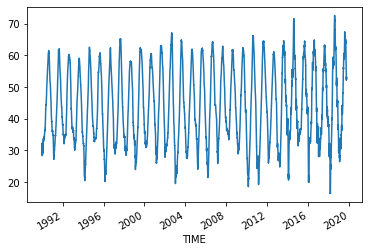

In [199]:
sample["TEMP_F"].ewm(com=200).mean().plot();

In addition to these moving window functions, pandas provides a method `.expanding()` which increases the size of the window on each observation until it encompasses the whole series. This method basically cumulates the information on each observation and can be useful e.g. in some predictive applications where cumulative information about the given phenomena can provide more accurate results after more observations have been observed. It is also possible to apply and chain your own functions together with `.rolling()` and `.expanding()`, such as `.rolling(20).apply(myOwnFunction)`. 

## Shifting - or leading and lagging data

TODO.

## Exercises

Add exercises.

## Footnotes

[^isostandard]: <https://en.wikipedia.org/wiki/ISO_8601>
[^dateoffsets]: <https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects>
[^interpolation]: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html>